In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Importing the dataset
data = pd.read_csv(r'D:\Machine learning\Polynomial regression\Datasets\Tissue Growth.csv')
data

,Unnamed: 0,Tissue Type,Growth Rate (mm/day),Days
0,0,Nervous,3.807947,76
1,1,Muscle,9.512072,7
2,2,Connective,7.346740,29
3,3,Epithelial,6.026719,11
4,4,Nervous,1.644585,33
...,...,...,...,...
795,795,Nervous,8.734027,31
796,796,Nervous,9.327971,78
797,797,Muscle,5.694819,20
798,798,Muscle,6.996843,18


In [4]:
data.shape

(800, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            800 non-null    int64  
 1   Tissue Type           800 non-null    object 
 2   Growth Rate (mm/day)  800 non-null    float64
 3   Days                  800 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 25.1+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,800.0,399.500000,231.084400,0.00000,199.750000,399.50000,599.250000,799.000000
Growth Rate (mm/day),800.0,5.019868,2.906708,0.15011,2.490114,5.11682,7.561327,9.997205
Days,800.0,48.455000,28.741792,1.00000,23.000000,46.50000,74.000000,99.000000


In [7]:
data.isnull().sum()

Unnamed: 0              0
Tissue Type             0
Growth Rate (mm/day)    0
Days                    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
data

,Tissue Type,Growth Rate (mm/day),Days
0,Nervous,3.807947,76
1,Muscle,9.512072,7
2,Connective,7.346740,29
3,Epithelial,6.026719,11
4,Nervous,1.644585,33
...,...,...,...
795,Nervous,8.734027,31
796,Nervous,9.327971,78
797,Muscle,5.694819,20
798,Muscle,6.996843,18


In [11]:
num = data.select_dtypes(include=np.number).columns.tolist()
cat = data.select_dtypes(include='object').columns

print(num)
print(cat)

['Growth Rate (mm/day)', 'Days']
Index(['Tissue Type'], dtype='object')


Growth Rate (mm/day)


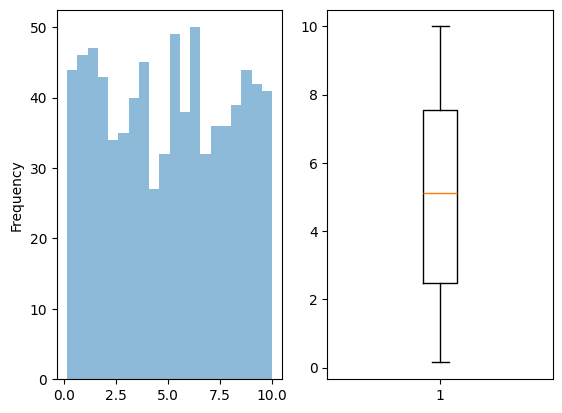

Days


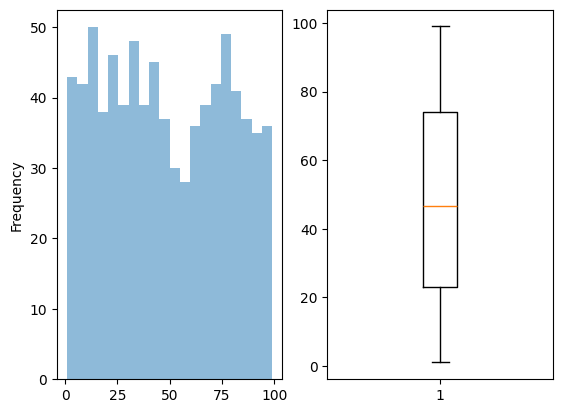

In [12]:
for i in num:
    print(i)
    plt.subplot(1,2,1)
    data[i].plot(kind='hist', bins=20, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.boxplot(data[i])
    
    plt.show()
    

In [13]:
data['Tissue Type'].value_counts()

Tissue Type
Epithelial    215
Muscle        204
Connective    204
Nervous       177
Name: count, dtype: int64

<Axes: xlabel='Tissue Type', ylabel='count'>

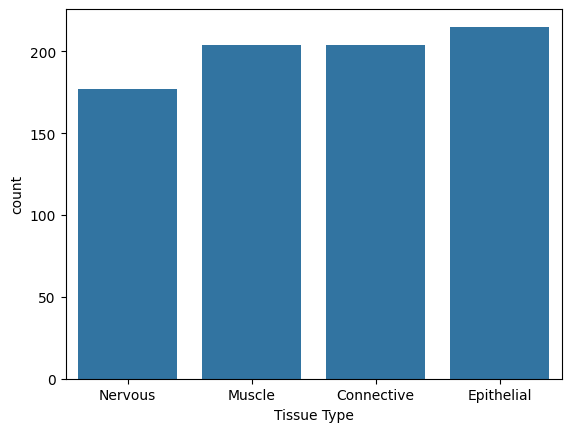

In [14]:
sns.countplot(x='Tissue Type', data=data)

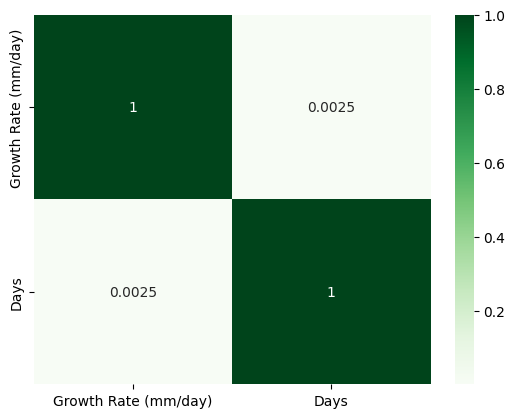

In [15]:
corr = data[num].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

In [17]:
# Preparing data for polynomial regression
X = data[['Days']]
y = data['Growth Rate (mm/day)']

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Create polynomial features
degree = 4   # Specify the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [39]:
# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [40]:
X_test_poly

array([[1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 3.6000000e+01, 1.2960000e+03, 4.6656000e+04,
        1.6796160e+06],
       [1.0000000e+00, 2.7000000e+01, 7.2900000e+02, 1.9683000e+04,
        5.3144100e+05],
       [1.0000000e+00, 7.1000000e+01, 5.0410000e+03, 3.5791100e+05,
        2.5411681e+07],
       [1.0000000e+00, 4.6000000e+01, 2.1160000e+03, 9.7336000e+04,
        4.4774560e+06],
       [1.0000000e+00, 9.0000000e+01, 8.1000000e+03, 7.2900000e+05,
        6.5610000e+07],
       [1.0000000e+00, 5.1000000e+01, 2.6010000e+03, 1.3265100e+05,
        6.7652010e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 8.2000000e+01, 6.7240000e+03, 5.5136800e+05,
        4.5212176e+07],
       [1.0000000e+00, 4.4000000e+01, 1.9360000e+03, 8.5184000e+04,
        3.7480960e+06],
       [1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.29

In [41]:
# Make predictions
y_pred = model.predict(X_test_poly)
y_pred

array([5.12945335, 5.18257016, 5.19608448, 5.12933924, 5.14341527,
       4.94243599, 5.12956302, 5.15452407, 5.08251088, 5.15064937,
       5.12285928, 4.96745501, 5.01730502, 4.96745501, 5.12305743,
       5.12882548, 5.13427748, 4.73249712, 5.12505639, 5.12408537,
       5.09198902, 5.12628274, 5.1585232 , 5.19376826, 5.12305743,
       5.05898179, 5.16672821, 5.12285928, 4.79104802, 5.18565801,
       5.12305743, 4.85125775, 5.18257016, 5.12376035, 5.16308407,
       5.19776957, 5.12647456, 5.12877439, 5.11269314, 5.19733832,
       5.16672821, 5.10696731, 5.1239947 , 5.12115161, 4.8844952 ,
       4.81495832, 5.19618433, 5.12933924, 5.19032949, 5.12475898,
       5.19376826, 5.12505639, 5.12247512, 5.12305743, 5.17882058,
       5.14693563, 5.06793725, 5.11269314, 5.13966709, 5.16260615,
       5.17882058, 5.08251088, 5.01034882, 4.85125775, 5.04468063,
       5.11738704, 4.42339769, 5.12877439, 5.12263457, 5.14341527,
       4.42339769, 4.98775749, 5.19618433, 5.19608448, 5.17215

In [42]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_train = r2_score(y_test, y_pred)

print("RMSE:", train_rmse)
print("R-squared:", r2_train)

RMSE: 2.84400533625093
R-squared: 0.019798893608665158


In [78]:
data[data['Days'] == 99]

,Tissue Type,Growth Rate (mm/day),Days
19,Epithelial,2.983168,99
264,Nervous,8.785993,99
459,Muscle,1.276297,99
585,Muscle,2.477442,99
775,Nervous,1.584183,99


In [44]:
y_pred = model.predict(poly_features.fit_transform([[100]]))
y_pred = y_pred[0]
y_pred

4.523161569025465